# The code written generates Fourier series for a square wave of desired time-period or amplitude.

### The documentation is written in comments. Feel free to edit the code as you desire and explore the beauty of Fourier Series.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [163]:
'''
--> The fourier series for square waves is created by entering the Amplitude and Time Period of the waves.
--> The generate_series method generate the values calculated by your fourier series. The parameter 'N' controls the number of terms in the series.
--> The plot_series method plots the series, it takes 'num_plots' as the parameter where num_plots
is the upper limit of number of terms in the series. Example for num_plots=5 the method will plot all the series with number of terms
equal to 1,2,3...num_plots.
--> Plot error plots the error. Here 'N' is the number of terms in the series of the error plot.
'''
class FourierS:
    def __init__(self, Amplitude, T):
        self.A_ = Amplitude
        self.w_o_ = (2*np.pi)*T
        self.T_ = T
        self.series_terms_ = []
        
    def generate_series(self, N):
        t = np.linspace(0 - 0.001*(self.T_),self.T_ + 0.001*(self.T_), 5000).reshape(-1,1)
        val = 0
        for i in range(0, int(N/2)+1):
            n = 2*i + 1
            val += np.sin(n*self.w_o_*t)
        val = ((4*self.A_)/np.pi)*val
        self.series_terms_.append(val)
        return
    def plot_series(self, num_plots,curr=False):
        fig, ax = plt.subplots(figsize=[12,12], dpi=300)
        t = np.linspace(0 - 0.001*(self.T_),self.T_ + 0.001*(self.T_), 5000).reshape(-1,1)
        ax.plot(t, (self.A_)*(signal.square(t*(self.w_o_))), linewidth=5)
        ax.set_title("Fourier Series")
        ax.set_xlabel("Time --->")
        ax.set_ylabel("Value --->")
        ax.axhline(0)
        ax.set_xlim(0 - 0.001*(self.T_),self.T_ + 0.001*(self.T_))
        if(curr==True):
            self.generate_series(num_plots)
            ax.plot(t, self.series_terms_[0],label=num_plots)
            return
        for i in range(1,num_plots+1):
            self.generate_series(i)
            ax.plot(t, self.series_terms_[i-1],label=i)
        if(num_plots<15):
            ax.legend()
        return
    def plot_error(self, N):
        t = np.linspace(0 - 0.001*(self.T_),self.T_ + 0.001*(self.T_), 5000).reshape(-1,1)
        orignal_func = (self.A_)*(signal.square(t*(self.w_o_)))
        self.generate_series(N)
        error_val = np.abs(self.series_terms_[-1] - orignal_func)
        fig,ax = plt.subplots(figsize=[12,12],dpi=300)
        ax.set_title("Error Plot")
        ax.set_xlabel("Time --->")
        ax.set_ylabel("Error --->")
        ax.plot(t, error_val, 'r-', label="Error {N}".format(N=N))
        ax.set_xlim(0 - 0.001*(self.T_),self.T_ + 0.001*(self.T_))
        return

In [164]:
fs = FourierS(1,1) #Fourier series object

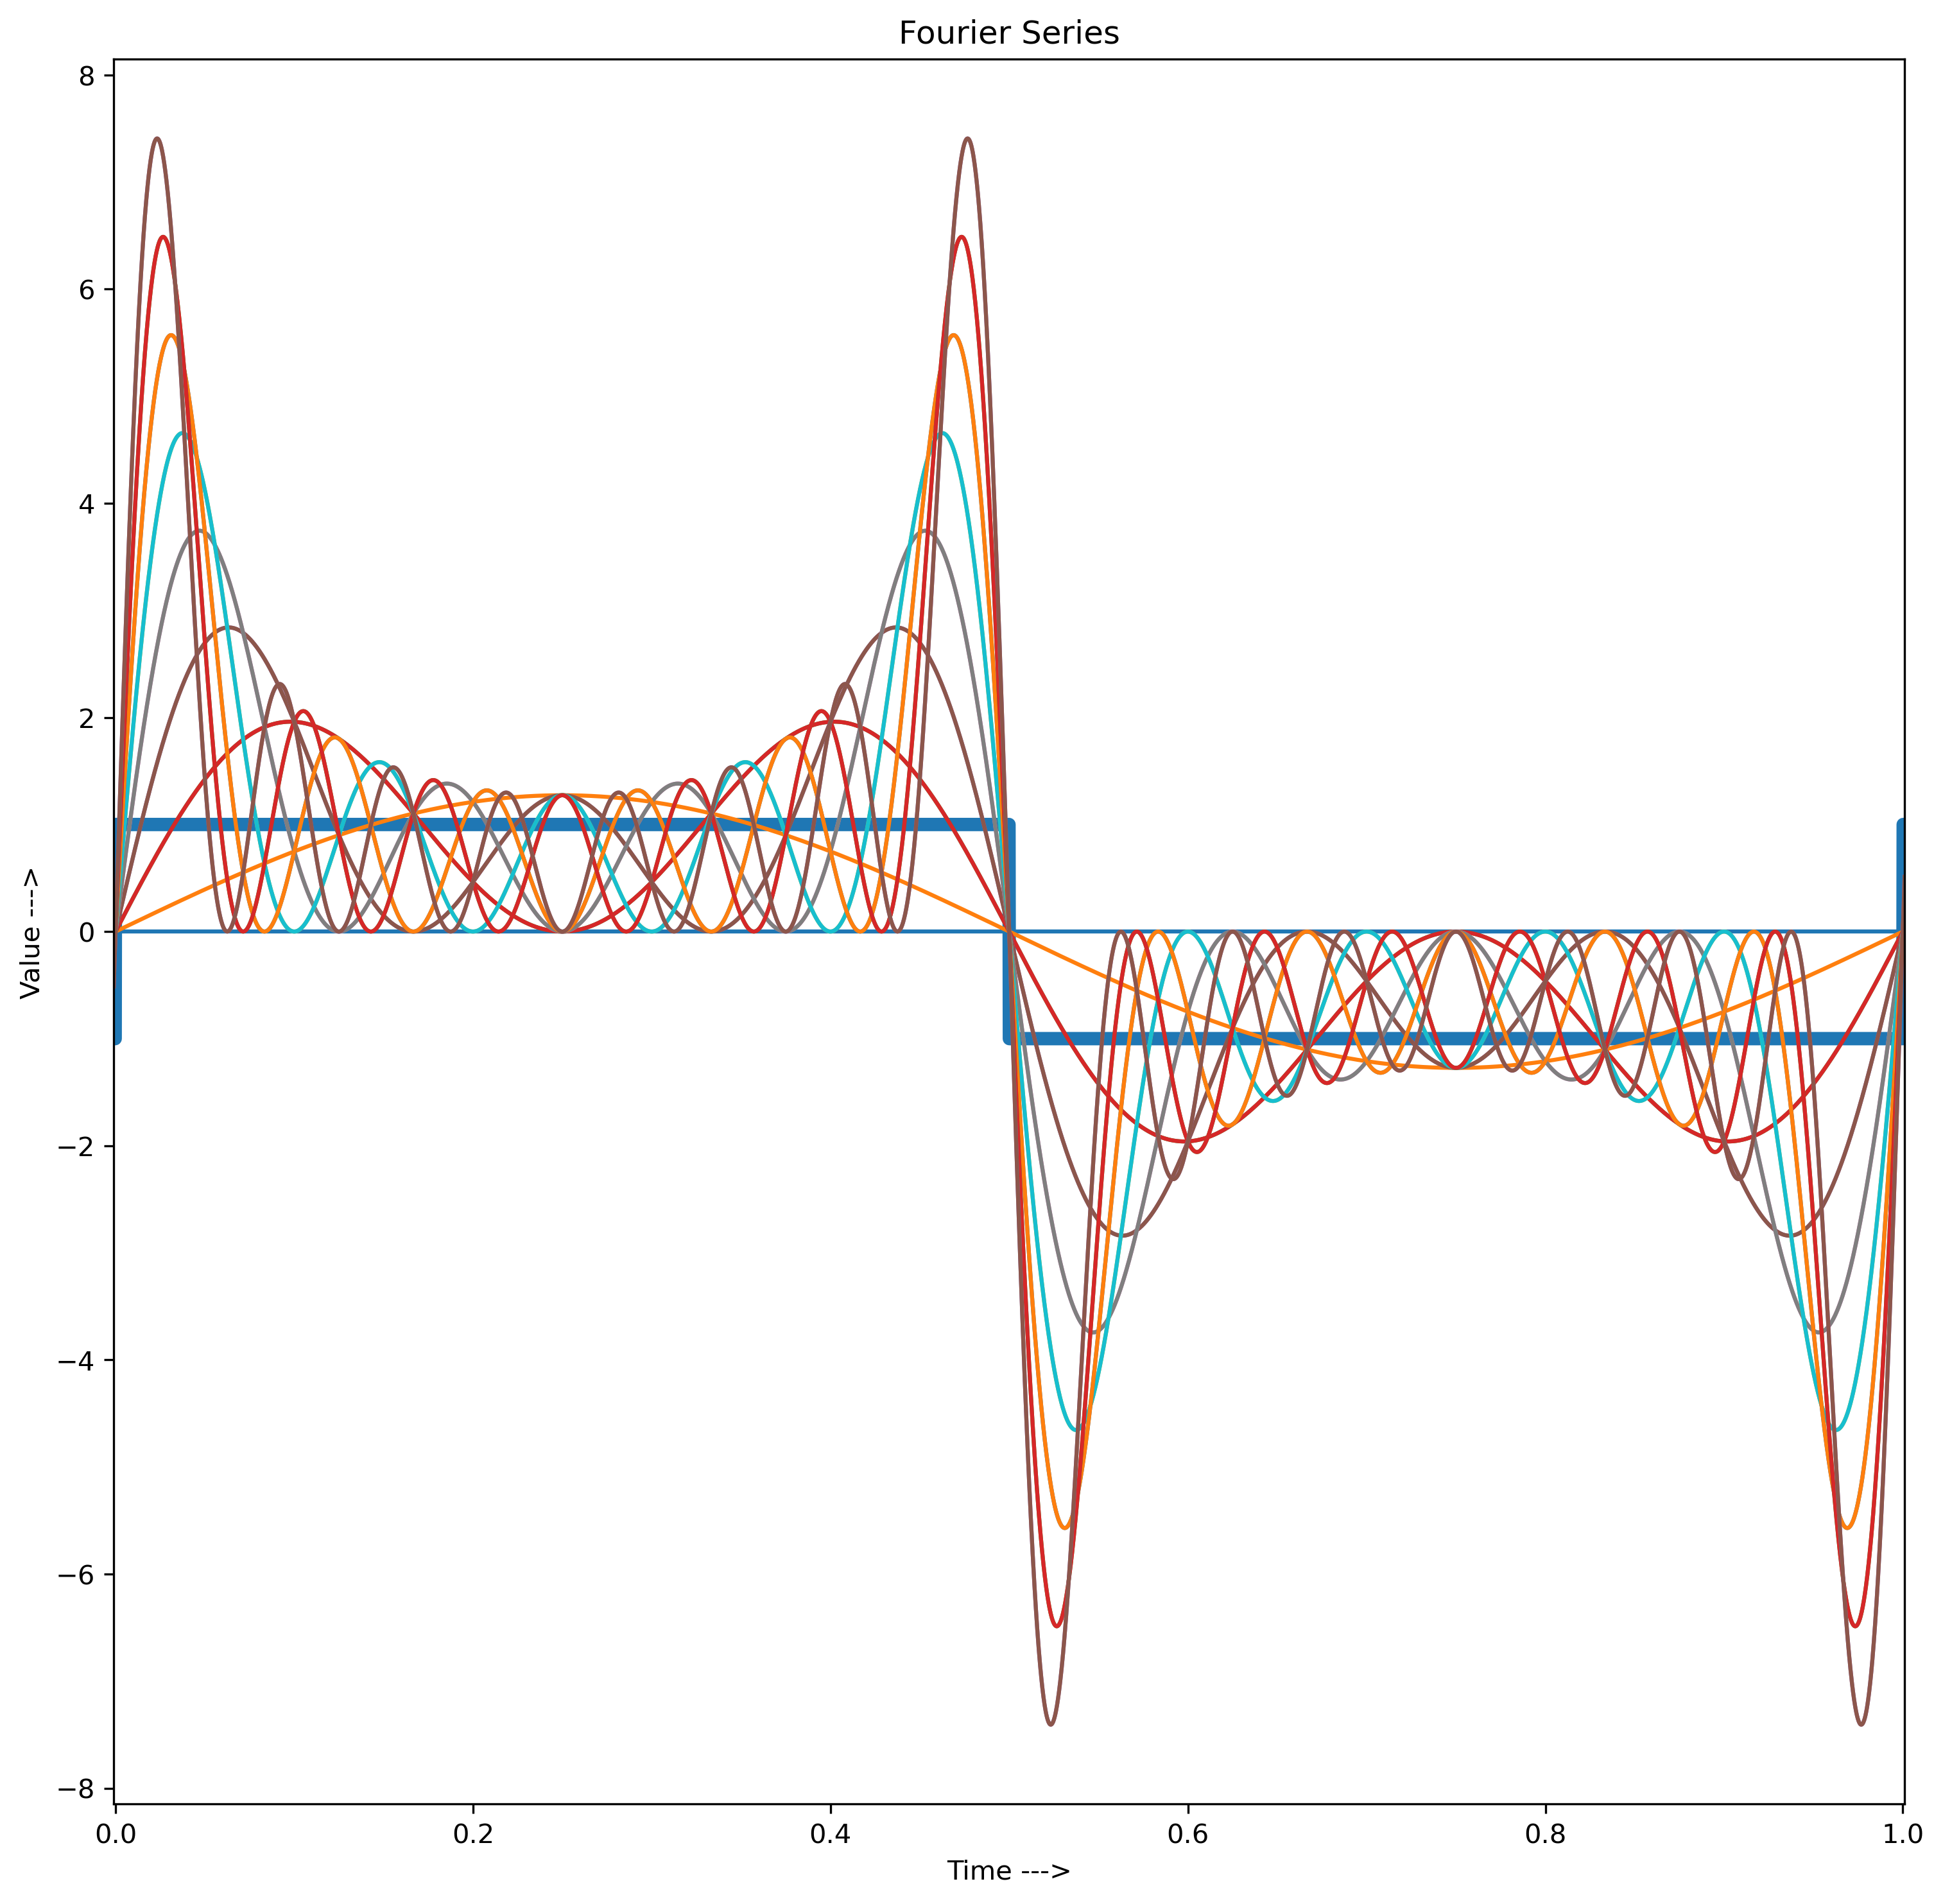

In [165]:
fs.plot_series(15,curr=False) #Series Plot

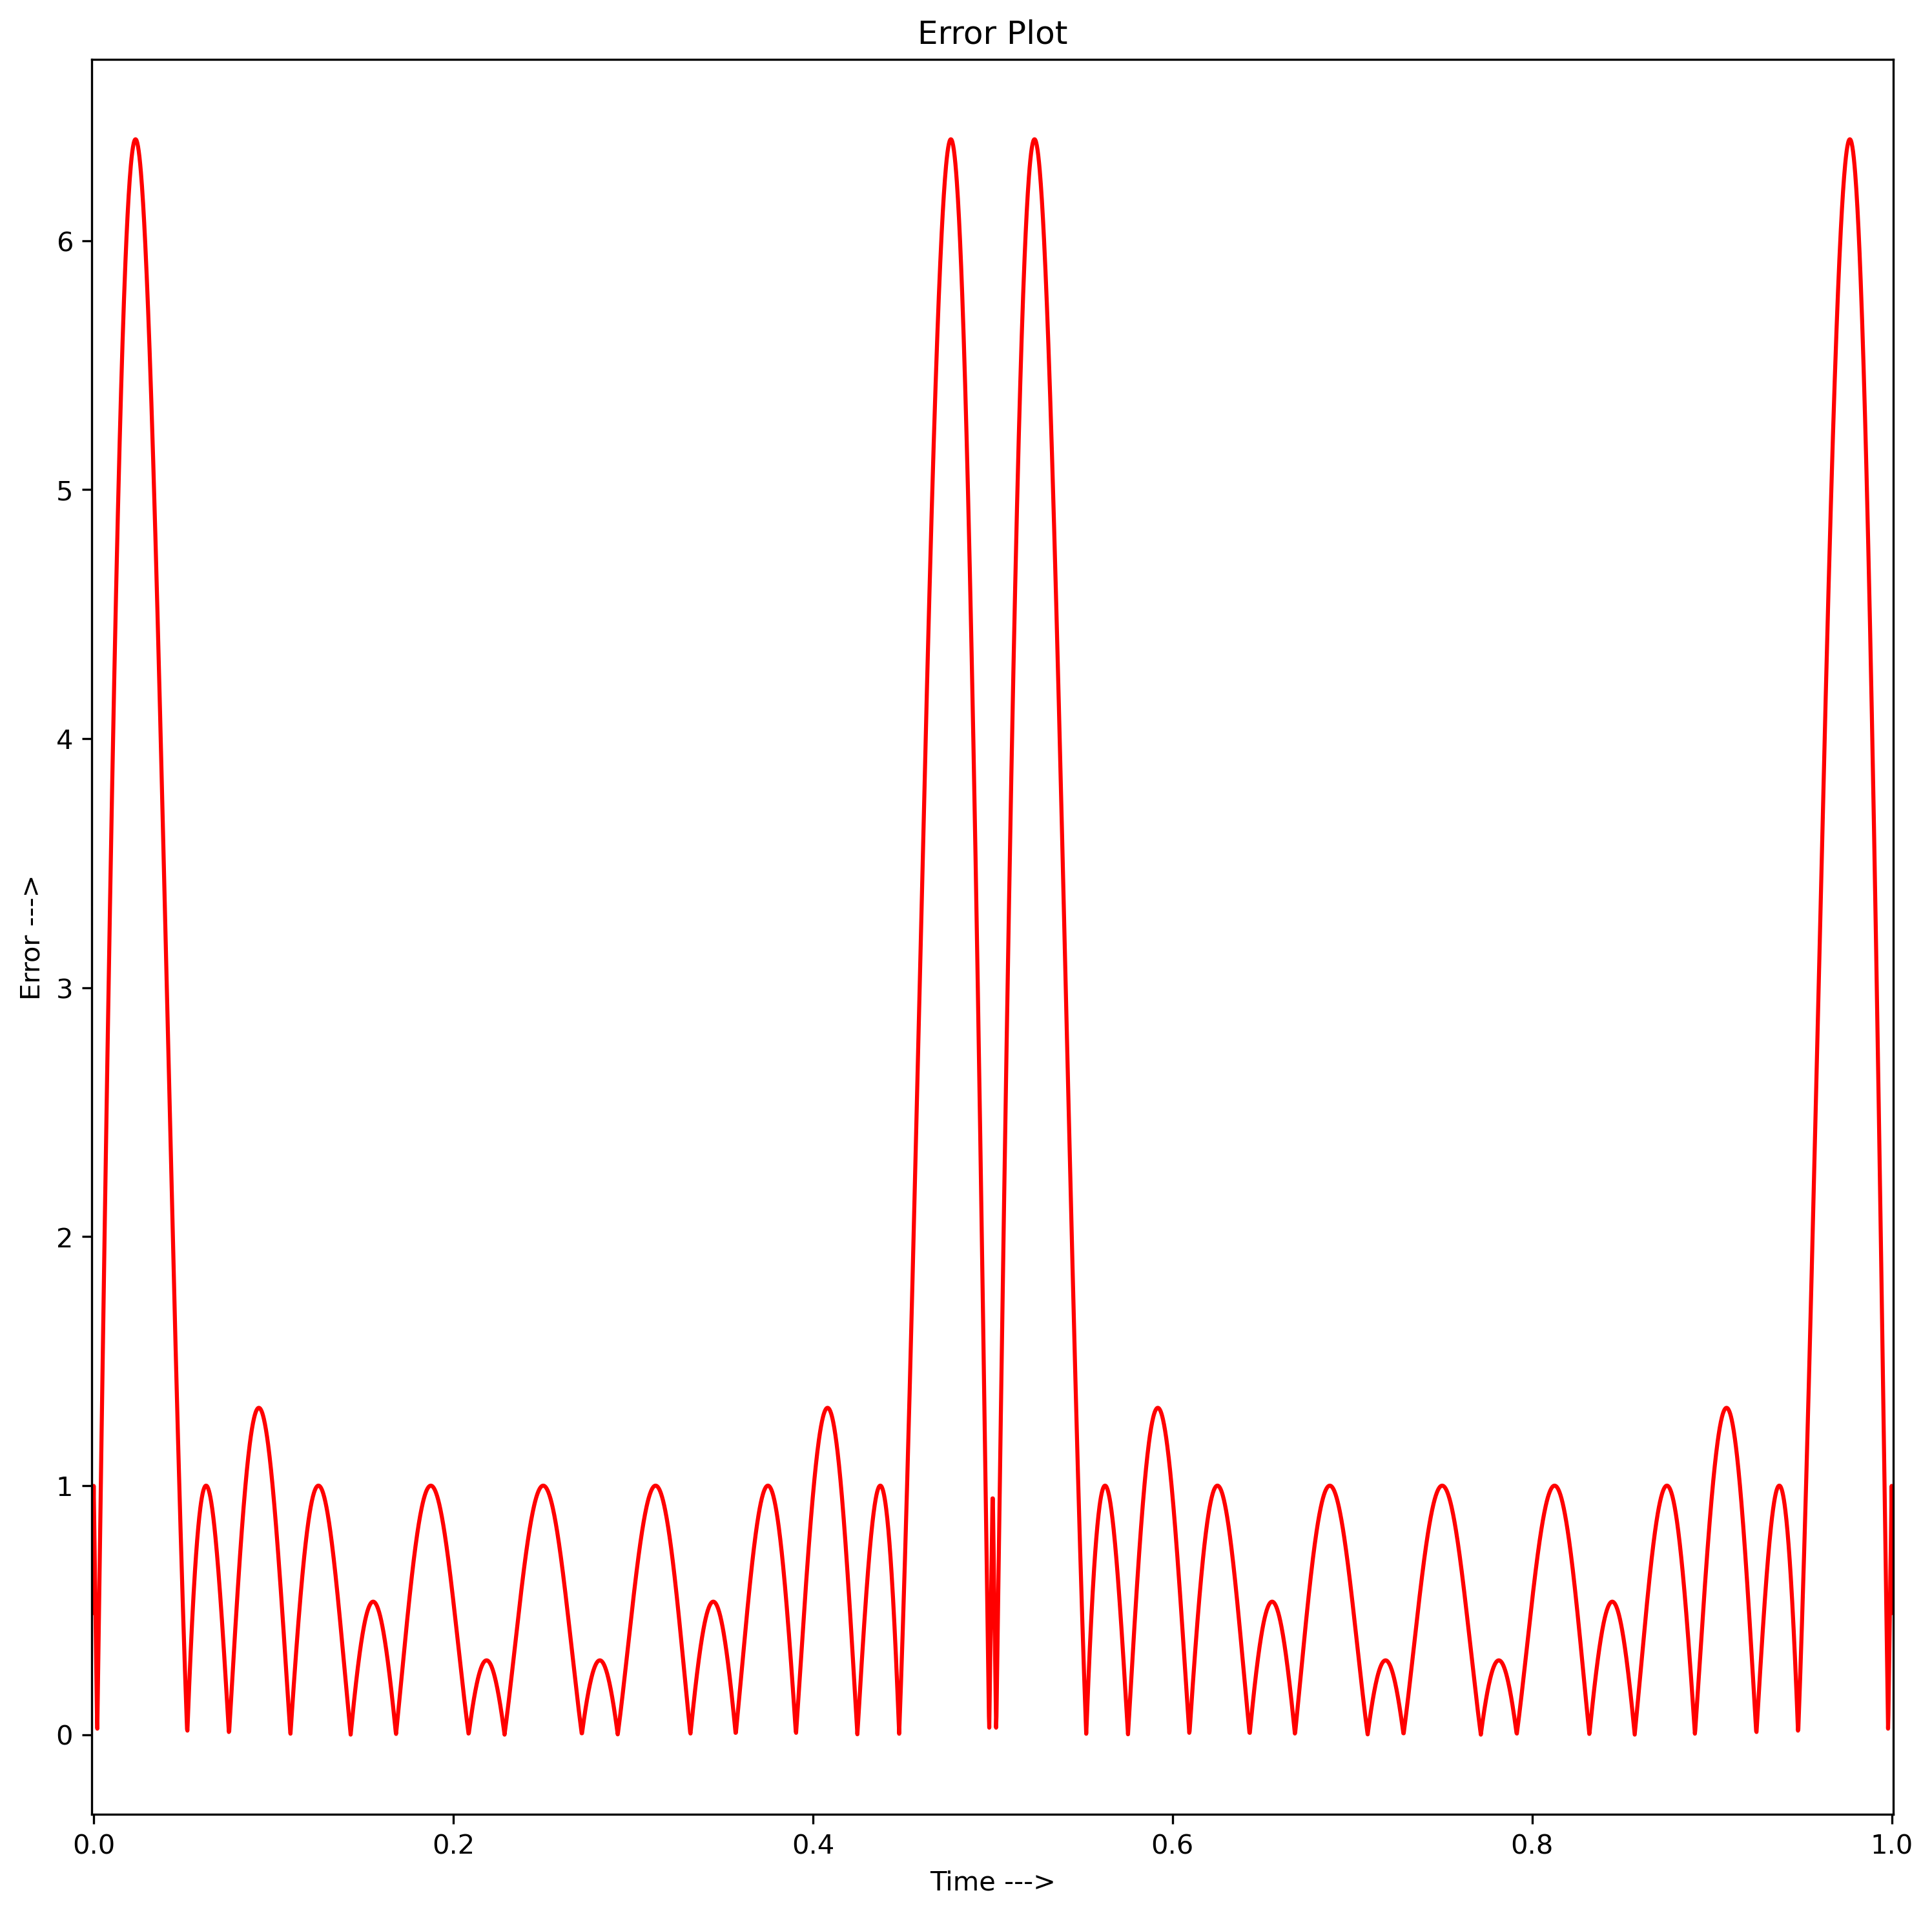

In [166]:
fs.plot_error(15) #Error Plot